# Logistic Regression with Python
We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.
### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

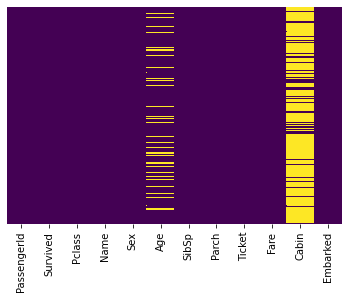

In [4]:
sns.heatmap(data.isnull(), yticklabels =False, cbar =False, cmap ="viridis")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"



In [5]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

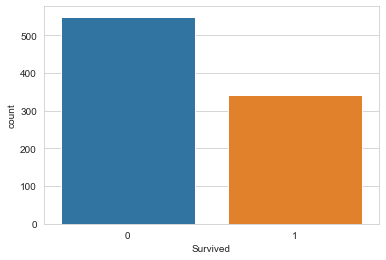

In [6]:
sns.countplot(x = "Survived", data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

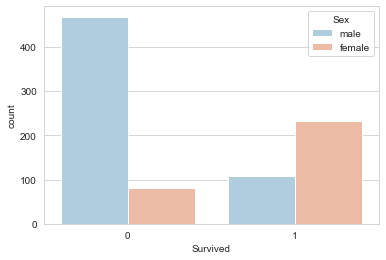

In [7]:
sns.countplot(x = "Survived", data = data, hue = "Sex", palette = "RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

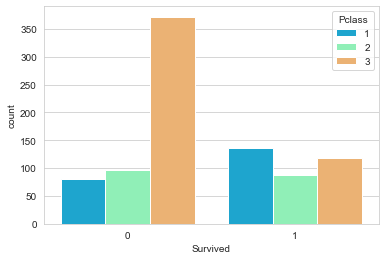

In [8]:
sns.countplot(x = "Survived", data = data, hue = "Pclass", palette = "rainbow")

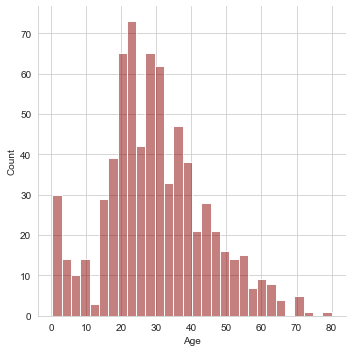

In [9]:
sns.displot(data["Age"].dropna(), kde = False, bins = 30, color = "darkred", alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

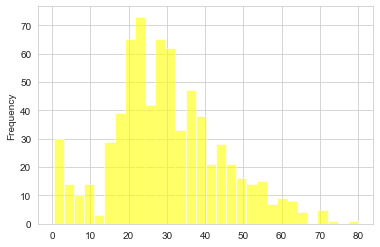

In [10]:
data["Age"].plot.hist(bins =30, color ="yellow", alpha = 0.6)

<AxesSubplot:>

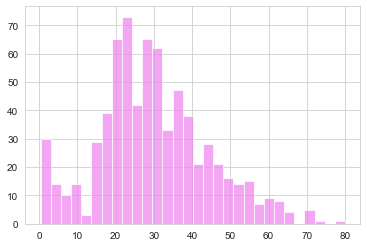

In [11]:
data["Age"].hist(bins = 30, color = "violet", alpha =0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

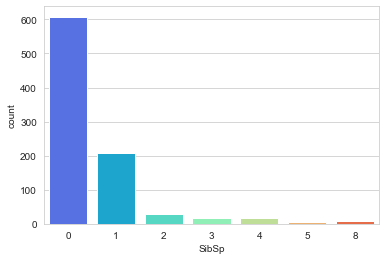

In [12]:
sns.countplot(x = data["SibSp"], data = data, palette = "rainbow")

<AxesSubplot:>

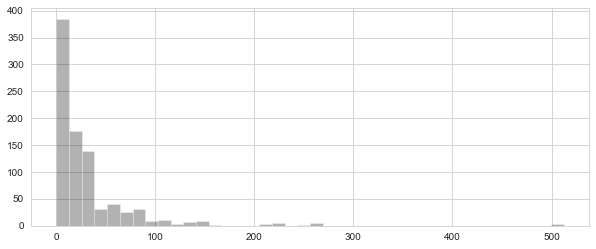

In [13]:
data["Fare"].hist(bins =40, color = "black", figsize = (10,4), alpha =0.3)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
data["Fare"].iplot(kind ="hist", bins = 50, color = "lightpink")

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

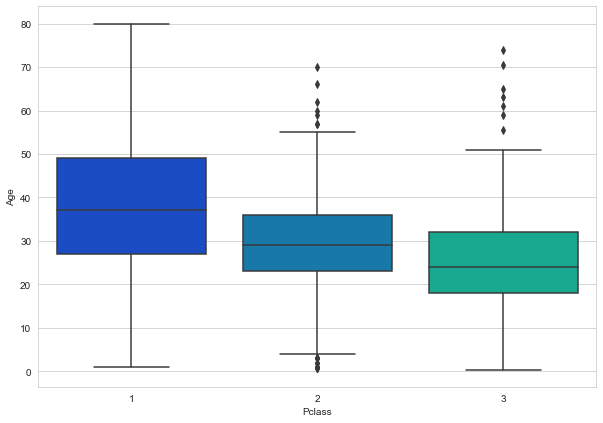

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Pclass", y = "Age", data = data, palette = "winter")

In [18]:
def impute_age_null(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [19]:
data["Age"] = data[["Age", "Pclass"]].apply(impute_age_null, axis = 1)

<AxesSubplot:>

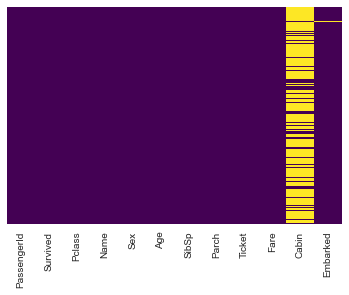

In [20]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [21]:
#as cabin is a feature which is of no use 
#so rather to impute the cabin feature we think it is better to remove cabin feature
data.drop("Cabin", inplace = True, axis =1)

<AxesSubplot:>

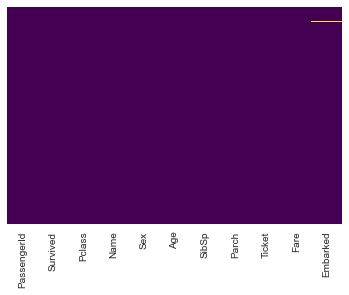

In [22]:
sns.heatmap(data.isnull(), yticklabels =False, cbar =False, cmap = "viridis")

In [23]:
#as we can see that there a single row which has embarked value as null
# so we would remove the row as by removing a single row the data would not be affected 
data.dropna(inplace = True)

<AxesSubplot:>

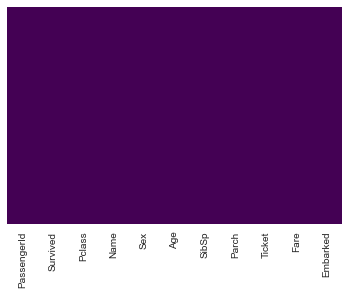

In [24]:
sns.heatmap(data.isnull(), yticklabels =False, cbar =False, cmap = "viridis")

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(data["Sex"], drop_first = True)

In [27]:
embark = pd.get_dummies(data["Embarked"], drop_first =True)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
data = pd.concat([data, sex, embark], axis = 1)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
#now in our data we don't need sex feature because male feature tells us 
# that if it is 1.0 it means passenger is male else female
# Similarly, we don't need embarked feature as we have concatenated embark which have 
#two columns i.e. Q and S where Q  has 1 it means Embarked value is Q, 
#else if S has 1 it means Embarked value is S
# and if S amd Q both has 0 it means Embarked value is C

In [32]:
#hence there is no need of Embarked and Sex feature 

# And in order to predict survival of the passenger there is no need of Name and Ticket feature
# and also these columns do not have integer values so these columns can cause trouble 
# in prediction 

#so, we remove some columns i.e. ["Sex", "Embarked", "Name", "Ticket"]

In [33]:
data.drop(["Sex", "Embarked", "Name", "Ticket"], inplace =True, axis = 1)

In [34]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [36]:
#If we see the data closely we will get to know that the values of 
# PassengerId and index are same so we remove PassengerId column

data.drop("PassengerId", axis =1, inplace =True)

In [37]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [38]:
X = data.drop("Survived", axis =1)
Y = data["Survived"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state =101)

## Training and Predicting

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()

In [43]:
logmodel.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [44]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(Y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)